wc: 11.513953993264469


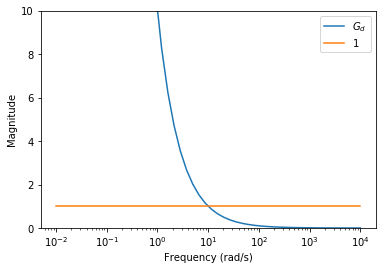

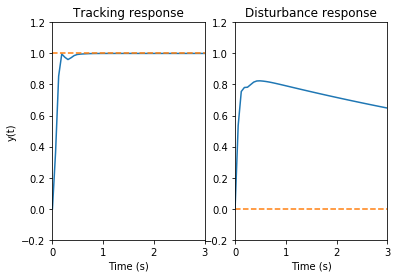

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

from utils import tf

def funG(s):
    return 200/((10*s + 1)*(0.05*s + 1)**2)

def funGd(s):
    return 100/(10*s + 1)

w = np.logspace(-2, 4)
s = w * 1j
Gdfr = funGd(s)
u = np.ones(len(w))

plt.figure('Graphical solution to find wc')
plt.semilogx(w, np.abs(Gdfr),label='$G_d$')
plt.semilogx(w, u, label='1')
plt.ylabel('Magnitude')
plt.xlabel('Frequency (rad/s)')
plt.legend()
plt.axis([None,None,0,10])

# numeric solution to find wc
wc = w[np.flatnonzero(np.abs(Gdfr) < 1)[0]]
print('wc:', wc)
# the solution of wc: 10 is an estimate in the handbook

s = tf([1, 0], 1)
G = funG(s)
Gd = funGd(s)

G2 = (200*(0.01*s + 1))/((10*s + 1)*(0.1*s + 1))  # simplified G
K = wc / s / G2
L = G*K
S = 1/(1 + L)
T = 1 - S
Sd = S*Gd

t = np.linspace(0, 3)
[t, yr] = T.step(0, t)
[t, yd] = Sd.step(0, t)

plt.figure('Figure 2.22')
plt.subplot(1, 2, 1)
plt.title('Tracking response')
plt.plot(t, yr)
plt.plot(t, u, '--')
plt.axis([0, 3, -0.2, 1.2])
plt.ylabel('y(t)')
plt.xlabel('Time (s)')

plt.subplot(1, 2, 2)
plt.title('Disturbance response')
plt.plot(t, yd)
plt.plot(t, u * 0, '--')
plt.axis([0, 3, -0.2, 1.2])
plt.xlabel('Time (s)')
plt.show()
